# ***CANCER CELL DETECTION***

## 1.Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2.About the Dataset

## 3.Data Preprocessing

In [2]:
cell_df=pd.read_csv('cell_samples.csv')
cell_df.head()


ID  Clump  UnifSize  UnifShape  MargAdh  SingEpiSize BareNuc  \
0  1000025      5         1          1        1            2       1   
1  1002945      5         4          4        5            7      10   
2  1015425      3         1          1        1            2       2   
3  1016277      6         8          8        1            3       4   
4  1017023      4         1          1        3            2       1   

   BlandChrom  NormNucl  Mit  Class  
0           3         1    1      2  
1           3         2    1      2  
2           3         1    1      2  
3           3         7    1      2  
4           3         1    1      2

In [3]:
cell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [4]:
cell_df.shape

(699, 11)

In [5]:
cell_df.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

## Distribution of classes for training and validation set

<Axes: xlabel='Clump', ylabel='UnifSize'>

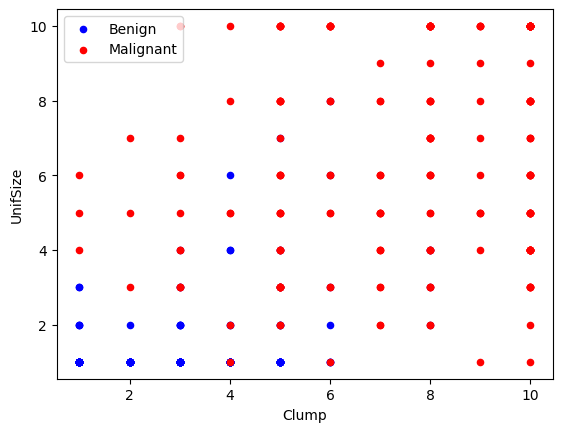

In [6]:
malig_df=cell_df[cell_df['Class']==4][0:200]
benign_df=cell_df[cell_df['Class']==2][0:200]


axes=benign_df.plot(kind='scatter',x='Clump',y='UnifSize',color='blue',label='Benign')
malig_df.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Malignant',ax=axes)

## Identifying unwanted rows of data

In [7]:
cell_df.dtypes

cell_df=cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc']=cell_df['BareNuc'].astype('int64')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

### REmoving the unwanted rows 

In [8]:
cell_df.columns

feature_df=cell_df[[ 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X=np.asarray(feature_df)
y=np.asarray(cell_df['Class'])


## Dividing the data into training and validation set

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [10]:
X_train.shape

(546, 9)

## Model Architecture

In [11]:
from sklearn import svm
clf=svm.SVC(kernel='linear',gamma='auto',C=2)
clf.fit(X_train,y_train)


SVC(C=2, gamma='auto', kernel='linear')

In [12]:
## Predicting
yhat=clf.predict(X_test)
yhat[0:5]


array([2, 4, 2, 4, 2], dtype=int64)

## Evaluation of the model

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [14]:
## Confusion Matrix
cnf_matrix=confusion_matrix(y_test,yhat,labels=[2,4])
print(cnf_matrix)

[[85  5]
 [ 0 47]]


mODEL 2. random forest classifier


In [17]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf=RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train,y_train)


RandomForestClassifier()

In [18]:
## Predicting
yhat_rf=clf_rf.predict(X_test)



array([2, 4, 2, 4, 2], dtype=int64)

In [19]:
## Confusion Matrix
cnf_matrix_rf=confusion_matrix(y_test,yhat_rf,labels=[2,4])
print(cnf_matrix_rf)
#test accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,yhat_rf))
#train accuracy
print(accuracy_score(y_train,clf_rf.predict(X_train)))


[[86  4]
 [ 0 47]]
0.9708029197080292
1.0
